In [9]:
import pandas as pd
import os

# 定义要读取的文件路径
file_path = "train_data.csv"

# 检查文件是否存在，避免报错
if not os.path.exists(file_path):
    print(f"错误：文件 '{file_path}' 不存在，请确认文件路径是否正确。")
else:
    # 读取CSV文件，默认使用utf-8编码，若有中文乱码可尝试encoding="gbk"
    df = pd.read_csv(file_path, encoding="utf-8-sig")
    
    # 1. 展示数据的基础信息
    print("=" * 50)
    print("1. 数据基础信息")
    print("=" * 50)
    print(f"数据总行数：{df.shape[0]}")
    print(f"数据总列数：{df.shape[1]}")
    print(f"\n所有列名（按当前顺序）：")
    for idx, col in enumerate(df.columns, 1):
        print(f"  {idx:2d}. {col}")
    
    # 2. 展示数据类型及非空值数量
    print("\n" + "=" * 50)
    print("2. 数据类型与非空值统计")
    print("=" * 50)
    print(df.info())
    
    # 3. 展示数据前5行（预览数据内容）
    print("\n" + "=" * 50)
    print("3. 数据前5行预览")
    print("=" * 50)
    print(df.head())
    
    # 4. 展示数值型数据的基本统计描述（如均值、标准差等）
    print("\n" + "=" * 50)
    print("4. 数值型数据统计描述")
    print("=" * 50)
    print(df.describe())
    
    # 5. 检查是否存在缺失值
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        print("\n" + "=" * 50)
        print("5. 存在缺失值的列（缺失数量）")
        print("=" * 50)
        print(missing_values)
    else:
        print("\n" + "=" * 50)
        print("5. 数据检查结果")
        print("=" * 50)
        print("✅ 数据无缺失值")

1. 数据基础信息
数据总行数：83096
数据总列数：29

所有列名（按当前顺序）：
   1. 城市
   2. 区域
   3. 板块
   4. Price
   5. 环线_数值
   6. 户型评分
   7. 楼层评分
   8. 建筑面积_数值
   9. 房屋朝向_分数
  10. 结构评分
  11. 装修评分
  12. 梯户比评分
  13. 电梯评分
  14. 别墅类型评分
  15. 权属评分
  16. 用途评分
  17. 房屋年限评分
  18. 产权所属评分
  19. 年份
  20. 房屋总数评分
  21. 楼栋总数评分
  22. 绿化率评分
  23. 容积率评分
  24. 物业费评分
  25. 供水评分
  26. 供暖评分
  27. 供电评分
  28. 燃气费评分
  29. 供热费评分

2. 数据类型与非空值统计
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83096 entries, 0 to 83095
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   城市       83096 non-null  int64  
 1   区域       83096 non-null  int64  
 2   板块       83096 non-null  int64  
 3   Price    83096 non-null  float64
 4   环线_数值    83096 non-null  float64
 5   户型评分     83096 non-null  int64  
 6   楼层评分     83096 non-null  int64  
 7   建筑面积_数值  83096 non-null  float64
 8   房屋朝向_分数  83096 non-null  float64
 9   结构评分     83096 non-null  int64  
 10  装修评分     83096 non-null  int64  
 1

In [10]:
import pandas as pd

# 1. 统计删除前的数据概况（总行数、各列空缺值数量）
print("=" * 60)
print("删除前数据概况")
print("=" * 60)
original_total_rows = len(df)
# 统计每列的空缺值数量
col_missing_count = df.isnull().sum()
# 统计存在空缺值的列数
cols_with_missing = col_missing_count[col_missing_count > 0].count()
# 统计包含空缺值的总行数（只要一行有任一空缺值，即被视为“含空缺值的行”）
rows_with_missing = df.isnull().any(axis=1).sum()

print(f"原始数据总行数：{original_total_rows}")
print(f"存在空缺值的列数：{cols_with_missing}")
print(f"包含空缺值的总行数：{rows_with_missing}")
print(f"预计删除后剩余行数：{original_total_rows - rows_with_missing}")

# （可选）显示各列的空缺值详情（若需针对性了解）
print("\n各列空缺值数量详情：")
for col, count in col_missing_count.items():
    if count > 0:
        print(f"  {col}：{count} 个空缺值")

# 2. 删除所有包含空缺值的行（axis=0按行删，how='any'有任一空缺即删）
df = df.dropna(axis=0, how='any').copy()

# 3. 验证删除结果
print("\n" + "=" * 60)
print("删除后结果验证")
print("=" * 60)
clean_total_rows = len(df)
deleted_rows = original_total_rows - clean_total_rows
# 确认删除后无任何空缺值
remaining_missing = df.isnull().sum().sum()

print(f"删除后剩余行数：{clean_total_rows}")
print(f"本次共删除行数：{deleted_rows}")
print(f"删除后剩余空缺值总数：{remaining_missing}")

if remaining_missing == 0:
    print("\n✅ 验证通过：删除后的数据集中无任何空缺值")
else:
    print(f"\n⚠️ 警告：删除后仍存在 {remaining_missing} 个空缺值，请检查数据或删除逻辑")

删除前数据概况
原始数据总行数：83096
存在空缺值的列数：1
包含空缺值的总行数：213
预计删除后剩余行数：82883

各列空缺值数量详情：
  权属评分：213 个空缺值

删除后结果验证
删除后剩余行数：82883
本次共删除行数：213
删除后剩余空缺值总数：0

✅ 验证通过：删除后的数据集中无任何空缺值


In [11]:
import pandas as pd

# 1. 检查目标列是否存在
target_cols = ["Price", "建筑面积_数值"]
missing_cols = [col for col in target_cols if col not in df.columns]

if missing_cols:
    print(f"警告：数据中缺少以下列，无法处理：{missing_cols}")
else:
    # 2. 复制原始数据，避免修改源数据
    df_clean = df.copy()
    
    # 3. 存储每列的3倍IQR阈值信息
    thresholds = {}
    
    # 4. 对“Price”和“建筑面积”依次用3倍IQR剔除异常值
    for col in target_cols:
        # 计算当前列的四分位数和IQR
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        iqr = q3 - q1
        
        # 3倍IQR阈值（宽松标准）
        lower = q1 - 3 * iqr
        upper = q3 + 3 * iqr
        thresholds[col] = (lower, upper)
        
        # 记录处理前后的行数
        before = len(df_clean)
        # 剔除超出阈值的异常值
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        after = len(df_clean)
        deleted = before - after
        
        # 输出该列的处理详情
        print(f"处理列：{col}")
        print(f"  3倍IQR阈值范围：[{lower:.2f}, {upper:.2f}]")
        print(f"  剔除异常值数量：{deleted}")
        print(f"  处理后剩余行数：{after}\n")
    
    # 5. 整体结果统计
    original_total = len(df)
    final_total = len(df_clean)
    total_deleted = original_total - final_total
    deleted_ratio = (total_deleted / original_total) * 100
    
    print("=" * 60)
    print("3倍IQR异常值处理结果汇总")
    print("=" * 60)
    print(f"原始数据总行数：{original_total}")
    print(f"累计剔除异常值行数：{total_deleted}（占比 {deleted_ratio:.2f}%）")
    print(f"最终保留行数：{final_total}")
    
    # 6. 验证处理效果（查看两列处理后的分布）
    print("\n处理后列分布统计：")
    for col in target_cols:
        print(f"\n{col} 统计描述：")
        print(df_clean[col].describe().round(2))

df=df_clean

处理列：Price
  3倍IQR阈值范围：[-4474965.85, 8048256.61]
  剔除异常值数量：2671
  处理后剩余行数：80212

处理列：建筑面积_数值
  3倍IQR阈值范围：[-68.00, 254.00]
  剔除异常值数量：801
  处理后剩余行数：79411

3倍IQR异常值处理结果汇总
原始数据总行数：82883
累计剔除异常值行数：3472（占比 4.19%）
最终保留行数：79411

处理后列分布统计：

Price 统计描述：
count      79411.00
mean     1905452.04
std      1478135.75
min        74896.50
25%       871250.26
50%      1422573.72
75%      2460141.41
max      8047340.37
Name: Price, dtype: float64

建筑面积_数值 统计描述：
count    79411.00
mean        94.12
std         36.18
min         11.70
25%         69.71
50%         89.90
75%        115.00
max        253.98
Name: 建筑面积_数值, dtype: float64


In [12]:
import pandas as pd

# 1. 确认数据中存在"Price"列（避免列名错误）
if 'Price' not in df.columns:
    raise ValueError("数据框 df 中不存在 'Price' 列，请检查列名是否正确（如是否为 'price' 小写）")

# 2. 拆分 X（特征变量）和 Y（目标变量）
# X：除"Price"外的所有列
X = df.drop(columns=['Price']).copy()
# Y：仅"Price"列（建议保留二维结构，方便后续建模）
Y = df[['Price']].copy()

# 3. 查看拆分结果信息（验证维度和数据类型）
print("=== 数据拆分结果 ===")
print(f"特征变量 X 的形状：{X.shape} （行：{X.shape[0]}，列：{X.shape[1]}）")
print(f"目标变量 Y 的形状：{Y.shape} （行：{Y.shape[0]}，列：{Y.shape[1]}）")

print("\n=== 特征变量 X 的前3列名称及前2行数据 ===")
print("列名：", X.columns[:3].tolist())  # 打印前3个特征列名
print(X.iloc[:2, :3])  # 打印前2行、前3列数据

print("\n=== 目标变量 Y 的前5行数据 ===")
print(Y.head())

=== 数据拆分结果 ===
特征变量 X 的形状：(79411, 28) （行：79411，列：28）
目标变量 Y 的形状：(79411, 1) （行：79411，列：1）

=== 特征变量 X 的前3列名称及前2行数据 ===
列名： ['城市', '区域', '板块']
   城市  区域    板块
0   3  20   793
1  10  17  1045

=== 目标变量 Y 的前5行数据 ===
          Price
0  2.469851e+06
1  1.322813e+05
2  1.071740e+06
3  1.235606e+06
4  9.025729e+05


原始数据：X形状(79411, 28)，Y形状(79411, 1)

数值型特征：['城市', '区域', '板块', '环线_数值', '户型评分']...（共28个）
类别型特征：[]...（共0个）
清洗后数据：X形状(79411, 28)，Y形状(79411, 1)

3. 相关性分析
特征与Price的相关性（绝对值Top10）：
建筑面积_数值    0.306632
供暖评分       0.283005
房屋年限评分     0.259576
户型评分       0.192785
环线_数值      0.173409
装修评分       0.159821
梯户比评分      0.148575
用途评分       0.126837
城市         0.117442
年份         0.116313
dtype: float64


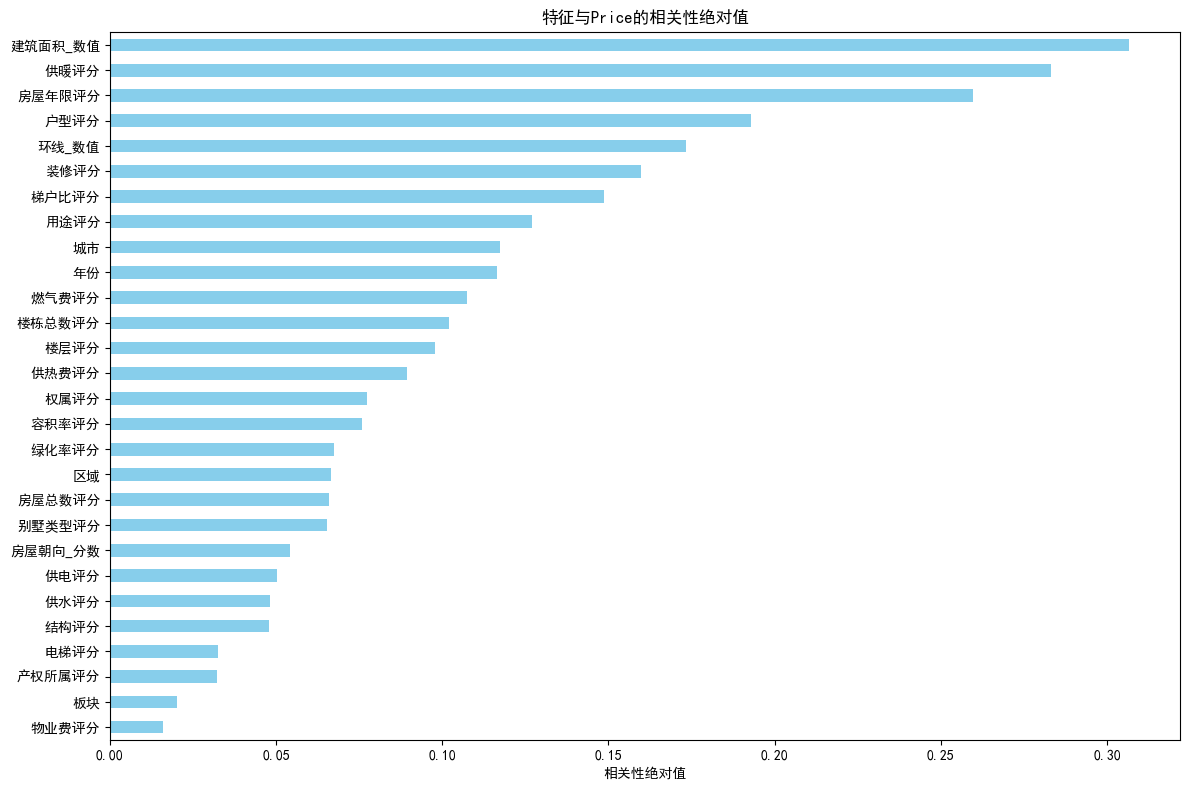


相关性筛选后保留的特征：12个

4. 方差膨胀因子（VIF）分析
初始VIF（降序前10）：
         特征        VIF
8        年份  53.354248
7      用途评分  49.184209
3      户型评分  43.845023
0   建筑面积_数值  26.713127
6     梯户比评分  11.558941
10   楼栋总数评分   6.836260
9     燃气费评分   5.822265
5      装修评分   4.500158
11       城市   3.800108
4     环线_数值   2.842737
移除高VIF特征：年份（VIF=53.35）
移除高VIF特征：户型评分（VIF=43.11）
移除高VIF特征：用途评分（VIF=23.53）

VIF筛选后保留的特征：9个
最终VIF（降序前5）：
        特征       VIF
5    梯户比评分  8.150541
0  建筑面积_数值  7.829795
7   楼栋总数评分  6.384677
6    燃气费评分  5.257220
4     装修评分  4.031818

5. Lasso回归特征选择
最优alpha值：10.000000

Lasso筛选后保留的特征：9个
Lasso系数（非零，按绝对值排序）：
        特征             系数          系数绝对值
0  建筑面积_数值  570949.340478  570949.340478
1     供暖评分  427468.586995  427468.586995
2   房屋年限评分  407157.723105  407157.723105
3    环线_数值  232749.628613  232749.628613
4     装修评分  196947.414559  196947.414559
6    燃气费评分 -137540.384920  137540.384920
8       城市   77387.278168   77387.278168
7   楼栋总数评分   42478.901726   42478.901726
5    梯户比评分    9053.561045   

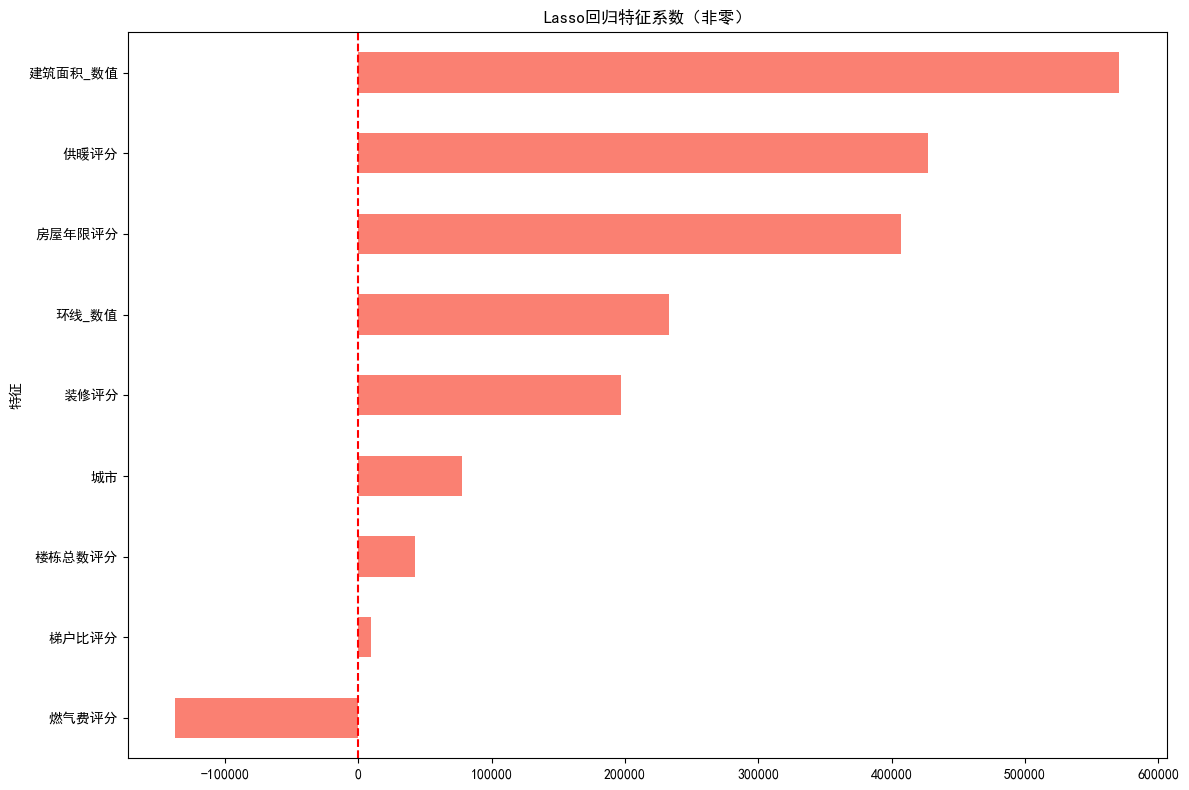


6. 最终特征选择结果
相关性筛选后：12个特征
VIF筛选后：9个特征
Lasso筛选后：9个特征

推荐使用的特征列表：
1. 建筑面积_数值
2. 供暖评分
3. 房屋年限评分
4. 环线_数值
5. 装修评分
6. 梯户比评分
7. 燃气费评分
8. 楼栋总数评分
9. 城市


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题


# ----------------------
# 1. 数据准备（假设已拆分X和Y，若未拆分需先执行拆分）
# ----------------------
# 注意：请确保df中包含'Price'列，且X为特征变量，Y为目标变量（Price）
# 若未拆分X和Y，先执行以下代码：
# X = df.drop(columns=['Price']).copy()
# Y = df[['Price']].copy()

# 验证X和Y是否存在
if 'X' not in locals() or 'Y' not in locals():
    raise ValueError("请先定义X（特征）和Y（目标变量Price）")

# 确保Y是二维DataFrame
if len(Y.shape) == 1:
    Y = Y.to_frame()
print(f"原始数据：X形状{X.shape}，Y形状{Y.shape}")


# ----------------------
# 2. 数据预处理（处理类别变量和缺失值）
# ----------------------
# 区分数值型和类别型特征
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\n数值型特征：{numeric_features[:5]}...（共{len(numeric_features)}个）")
print(f"类别型特征：{categorical_features[:5]}...（共{len(categorical_features)}个）")

# 对类别型特征进行独热编码
if categorical_features:
    X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)
    print(f"独热编码后特征数量：{X_encoded.shape[1]}")
else:
    X_encoded = X.copy()

# 合并X和Y，同步处理缺失值（关键：确保样本数量一致）
combined = pd.concat([X_encoded, Y], axis=1)
combined = combined.replace([np.inf, -np.inf], np.nan)  # 处理无穷值
combined = combined.dropna()  # 删除含缺失值的行（或用fillna填充）

# 重新拆分清洗后的X和Y
X_clean = combined.drop(columns=Y.columns)
Y_clean = combined[Y.columns]
print(f"清洗后数据：X形状{X_clean.shape}，Y形状{Y_clean.shape}")


# ----------------------
# 3. 相关性分析（筛选与Y强相关的特征）
# ----------------------
print("\n" + "="*60)
print("3. 相关性分析")
print("="*60)

# 计算特征与Y的相关性
corr_with_y = X_clean.apply(lambda x: x.corr(Y_clean.iloc[:, 0]))  # 用Y的第一列计算
corr_with_y = corr_with_y.sort_values(ascending=False)

# 显示相关性绝对值Top10的特征
print("特征与Price的相关性（绝对值Top10）：")
print(corr_with_y.abs().sort_values(ascending=False).head(10))

# 可视化相关性
plt.figure(figsize=(12, 8))
corr_plot = corr_with_y.abs().sort_values()
corr_plot.plot(kind="barh", color='skyblue')
plt.title("特征与Price的相关性绝对值")
plt.xlabel("相关性绝对值")
plt.tight_layout()
plt.show()

# 筛选相关性绝对值大于阈值的特征
corr_threshold = 0.1  # 可调整阈值
corr_selected = corr_with_y[abs(corr_with_y) > corr_threshold].index.tolist()
print(f"\n相关性筛选后保留的特征：{len(corr_selected)}个")


# ----------------------
# 4. VIF分析（处理多重共线性）
# ----------------------
print("\n" + "="*60)
print("4. 方差膨胀因子（VIF）分析")
print("="*60)

def calculate_vif(X_df):
    """计算VIF并排序"""
    vif_data = pd.DataFrame()
    vif_data["特征"] = X_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    return vif_data.sort_values("VIF", ascending=False)

# 对相关性筛选后的特征计算VIF
if len(corr_selected) == 0:
    raise ValueError("相关性筛选后无特征保留，请降低corr_threshold阈值")

X_corr = X_clean[corr_selected]
vif_df = calculate_vif(X_corr)
print("初始VIF（降序前10）：")
print(vif_df.head(10))

# 迭代移除高VIF特征（VIF>10认为共线性严重）
vif_threshold = 10.0
vif_selected = corr_selected.copy()

while True:
    current_vif = calculate_vif(X_clean[vif_selected])
    max_vif = current_vif["VIF"].max()
    if max_vif > vif_threshold and len(vif_selected) > 1:
        drop_feature = current_vif.iloc[0]["特征"]
        vif_selected.remove(drop_feature)
        print(f"移除高VIF特征：{drop_feature}（VIF={max_vif:.2f}）")
    else:
        break

print(f"\nVIF筛选后保留的特征：{len(vif_selected)}个")
print("最终VIF（降序前5）：")
print(calculate_vif(X_clean[vif_selected]).head())


# ----------------------
# 5. Lasso回归（筛选重要特征）
# ----------------------
print("\n" + "="*60)
print("5. Lasso回归特征选择")
print("="*60)

# 标准化特征（Lasso对尺度敏感）
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_clean[vif_selected]),
    columns=X_clean[vif_selected].columns
)

# 划分训练集
X_train, _, y_train, _ = train_test_split(
    X_scaled, Y_clean, test_size=0.2, random_state=42
)

# 交叉验证选择最优alpha
lasso_cv = LassoCV(
    alphas=np.logspace(-4, 1, 100),  # alpha候选值范围
    cv=5,  # 5折交叉验证
    random_state=42,
    max_iter=10000
)
lasso_cv.fit(X_train, y_train.values.ravel())  # ravel()将Y转为一维（LassoCV兼容）
best_alpha = lasso_cv.alpha_
print(f"最优alpha值：{best_alpha:.6f}")

# 用最优alpha训练Lasso
lasso = Lasso(alpha=best_alpha, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train.values.ravel())

# 提取非零系数特征（重要特征）
lasso_coef = pd.DataFrame({
    "特征": X_train.columns,
    "系数": lasso.coef_
})
lasso_selected = lasso_coef[lasso_coef["系数"] != 0]["特征"].tolist()

print(f"\nLasso筛选后保留的特征：{len(lasso_selected)}个")
print("Lasso系数（非零，按绝对值排序）：")
print(lasso_coef.assign(系数绝对值=lambda x: x["系数"].abs())
      .sort_values("系数绝对值", ascending=False)
      .head(10))

# 可视化Lasso系数
plt.figure(figsize=(12, 8))
lasso_plot = lasso_coef.set_index("特征")["系数"].sort_values()
lasso_plot.plot(kind="barh", color='salmon')
plt.axvline(x=0, color="red", linestyle="--")
plt.title("Lasso回归特征系数（非零）")
plt.tight_layout()
plt.show()


# ----------------------
# 6. 最终特征选择结果
# ----------------------
print("\n" + "="*60)
print("6. 最终特征选择结果")
print("="*60)
print(f"相关性筛选后：{len(corr_selected)}个特征")
print(f"VIF筛选后：{len(vif_selected)}个特征")
print(f"Lasso筛选后：{len(lasso_selected)}个特征")

print("\n推荐使用的特征列表：")
for i, feature in enumerate(lasso_selected, 1):
    print(f"{i}. {feature}")

In [17]:
import pandas as pd

# 1. 定义需要提取的推荐特征列表（与需求完全一致）
selected_features = [
    '建筑面积_数值',
    '供暖评分',
    '房屋年限评分',
    '环线_数值',
    '装修评分',
    '梯户比评分',
    '燃气费评分',
    '楼栋总数评分',
    '城市'
]

# 2. 检查特征是否都存在于X中，避免KeyError
missing_features = [feat for feat in selected_features if feat not in X.columns]
if missing_features:
    print(f"警告：X中不存在以下特征，已跳过：{missing_features}")
    # 仅保留存在的特征
    selected_features = [feat for feat in selected_features if feat in X.columns]

# 3. 提取特征到新的X_selected中
X_selected = X[selected_features].copy()

# 4. 验证提取结果
print(f"\n提取的特征数量：{len(X_selected.columns)}（预期9个，实际{len(X_selected.columns)}个）")
print("提取的特征列表：")
for i, feat in enumerate(X_selected.columns, 1):
    print(f"{i}. {feat}")

# 5. 预览前5行数据
print("\n提取的数据预览：")
print(X_selected.head())


提取的特征数量：9（预期9个，实际9个）
提取的特征列表：
1. 建筑面积_数值
2. 供暖评分
3. 房屋年限评分
4. 环线_数值
5. 装修评分
6. 梯户比评分
7. 燃气费评分
8. 楼栋总数评分
9. 城市

提取的数据预览：
   建筑面积_数值  供暖评分  房屋年限评分  环线_数值  装修评分  梯户比评分  燃气费评分  楼栋总数评分  城市
0   140.33     0       1    7.0     0      4      0       4   3
1    12.50     0       5    0.0     0      0      3       3  10
2   118.00     0       1   11.0     0      4      0       5   3
3    28.94     3       5    5.0     2      2      5       5   4
4    81.00     0       0    2.0     3      3      4       5   2


In [20]:
import pandas as pd

# 1. 定义保存路径（可自定义，如 './data/' 需确保文件夹存在）
save_path_X = 'X_selected.csv'  # 特征数据保存路径
save_path_Y = 'Y.csv'           # 目标变量保存路径

# 2. 导出X_selected为CSV（index=False 不保存行索引）
X_selected.to_csv(save_path_X, index=False, encoding='utf-8-sig')
print(f"特征数据已导出至：{save_path_X}")

# 3. 导出Y为CSV
Y.to_csv(save_path_Y, index=False, encoding='utf-8-sig')
print(f"目标变量数据已导出至：{save_path_Y}")

# 4. 验证导出结果（可选，检查前2行数据）
print("\n=== 验证导出数据 ===")
print("X_selected 前2行：")
print(pd.read_csv(save_path_X).head(2))

print("\nY 前2行：")
print(pd.read_csv(save_path_Y).head(2))

特征数据已导出至：X_selected.csv
目标变量数据已导出至：Y.csv

=== 验证导出数据 ===
X_selected 前2行：
   建筑面积_数值  供暖评分  房屋年限评分  环线_数值  装修评分  梯户比评分  燃气费评分  楼栋总数评分  城市
0   140.33     0       1    7.0     0      4      0       4   3
1    12.50     0       5    0.0     0      0      3       3  10

Y 前2行：
          Price
0  2.469851e+06
1  1.322813e+05


In [21]:
import pandas as pd

# 1. 提取特征列生成X_all
feature_columns = [
    "建筑面积_数值", 
    "供暖评分", 
    "房屋年限评分", 
    "环线_数值", 
    "装修评分", 
    "梯户比评分", 
    "燃气费评分", 
    "楼栋总数评分", 
    "城市"
]

# 提取特征列（确保列名正确，若有拼写差异需调整）
X_all = df[feature_columns].copy()

# 2. 提取目标变量生成Y_all
Y_all = df["Price"].copy().to_frame()  # 转换为DataFrame便于保存为CSV

# 3. 保存为CSV文件（支持中文，不保留索引）
X_all.to_csv("X_all.csv", index=False, encoding="utf-8-sig")
Y_all.to_csv("Y_all.csv", index=False, encoding="utf-8-sig")

# 4. 输出确认信息
print(f"X_all 已保存至 X_all.csv，形状：{X_all.shape}")
print(f"Y_all 已保存至 Y_all.csv，形状：{Y_all.shape}")

# 预览前5行
print("\nX_all 前5行：")
print(X_all.head())
print("\nY_all 前5行：")
print(Y_all.head())

X_all 已保存至 X_all.csv，形状：(79411, 9)
Y_all 已保存至 Y_all.csv，形状：(79411, 1)

X_all 前5行：
   建筑面积_数值  供暖评分  房屋年限评分  环线_数值  装修评分  梯户比评分  燃气费评分  楼栋总数评分  城市
0   140.33     0       1    7.0     0      4      0       4   3
1    12.50     0       5    0.0     0      0      3       3  10
2   118.00     0       1   11.0     0      4      0       5   3
3    28.94     3       5    5.0     2      2      5       5   4
4    81.00     0       0    2.0     3      3      4       5   2

Y_all 前5行：
          Price
0  2.469851e+06
1  1.322813e+05
2  1.071740e+06
3  1.235606e+06
4  9.025729e+05
